INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp339cy1dd/oviw4abl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp339cy1dd/7eztyqtx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39205', 'data', 'file=/tmp/tmp339cy1dd/oviw4abl.json', 'init=/tmp/tmp339cy1dd/7eztyqtx.json', 'output', 'file=/tmp/tmp339cy1dd/prophet_modelusgs_j5n/prophet_model-20250727152444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:24:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


SARIMA → RMSE: 1483.89 | MAE: 1179.46
Prophet → RMSE: 1453.68 | MAE: 923.49


/tmp/ipython-input-1-4074665605.py:73: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


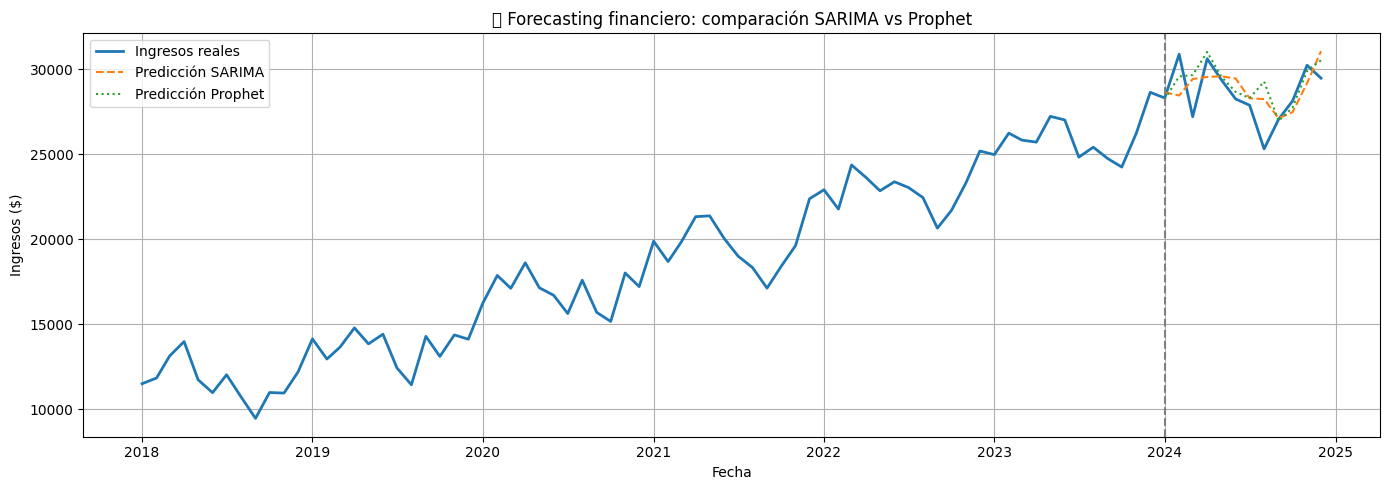

,Modelo,RMSE,MAE
0,SARIMA,1483.891711,1179.464606
1,Prophet,1453.679205,923.490509


In [1]:
#0. INSTALACIÓN NECESARIA (solo si usas Google Colab)
!pip install -q prophet statsmodels

#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ===============================
# SIMULACIÓN DE DATOS MENSUALES
# ===============================
np.random.seed(42)
dates = pd.date_range(start="2018-01-01", end="2024-12-01", freq="MS")
n_months = len(dates)

trend = np.linspace(10000, 30000, n_months)
seasonality = 2000 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 1000, n_months)
revenue = trend + seasonality + noise

df = pd.DataFrame({'ds': dates, 'y': revenue})

# ===============================
#ENTRENAMIENTO Y VALIDACIÓN
# ===============================
train = df[df['ds'] < '2024-01-01']
test = df[df['ds'] >= '2024-01-01']

# ===============================
# SARIMA MODEL
# ===============================
sarima_model = SARIMAX(train['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.predict(start=len(train), end=len(df)-1)

# ===============================
# PROPHET MODEL
# ===============================
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(train[['ds', 'y']])
future = prophet_model.make_future_dataframe(periods=len(test), freq='MS')
prophet_forecast = prophet_model.predict(future)
prophet_pred = prophet_forecast.tail(len(test))['yhat'].values

# ===============================
# MÉTRICAS DE COMPARACIÓN
# ===============================
sarima_rmse = np.sqrt(mean_squared_error(test['y'], sarima_forecast))
prophet_rmse = np.sqrt(mean_squared_error(test['y'], prophet_pred))

sarima_mae = mean_absolute_error(test['y'], sarima_forecast)
prophet_mae = mean_absolute_error(test['y'], prophet_pred)

print(f"SARIMA → RMSE: {sarima_rmse:.2f} | MAE: {sarima_mae:.2f}")
print(f"Prophet → RMSE: {prophet_rmse:.2f} | MAE: {prophet_mae:.2f}")

# ===============================
# VISUALIZACIÓN DE RESULTADOS
# ===============================
plt.figure(figsize=(14, 5))
plt.plot(df['ds'], df['y'], label='Ingresos reales', linewidth=2)
plt.plot(test['ds'], sarima_forecast, label='Predicción SARIMA', linestyle='--')
plt.plot(test['ds'], prophet_pred, label='Predicción Prophet', linestyle=':')
plt.axvline(pd.to_datetime('2024-01-01'), color='gray', linestyle='--')
plt.title("Forecasting financiero: comparación SARIMA vs Prophet")
plt.xlabel("Fecha")
plt.ylabel("Ingresos ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# TABLA DE MÉTRICAS
# ===============================
metrics = pd.DataFrame({
    'Modelo': ['SARIMA', 'Prophet'],
    'RMSE': [sarima_rmse, prophet_rmse],
    'MAE': [sarima_mae, prophet_mae]
})
metrics


/tmp/ipython-input-2-750820088.py:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


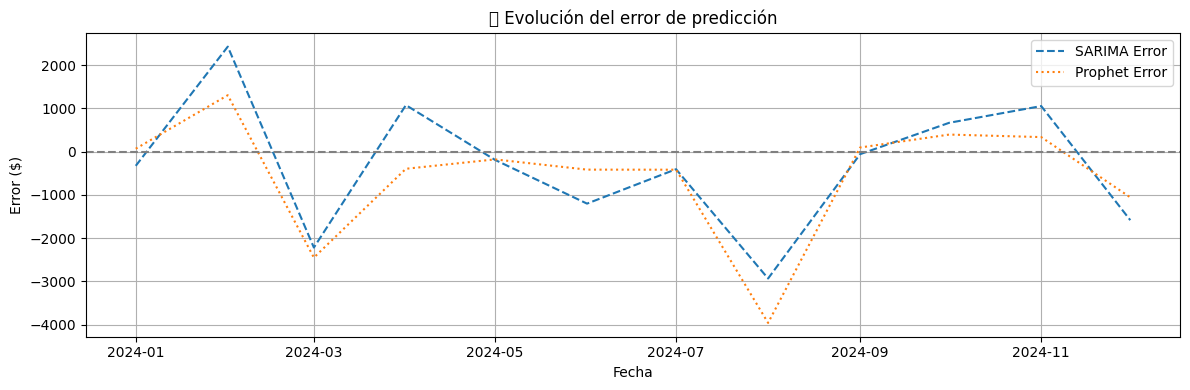

/tmp/ipython-input-2-750820088.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


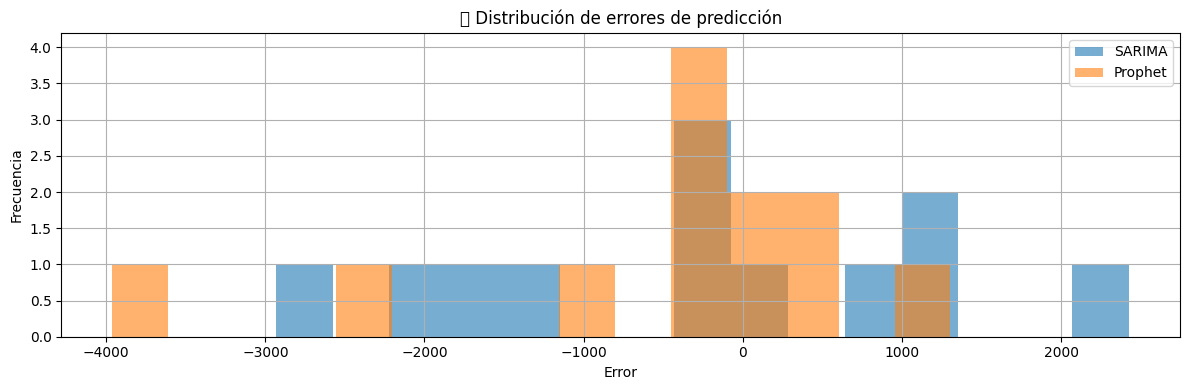

/tmp/ipython-input-2-750820088.py:45: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


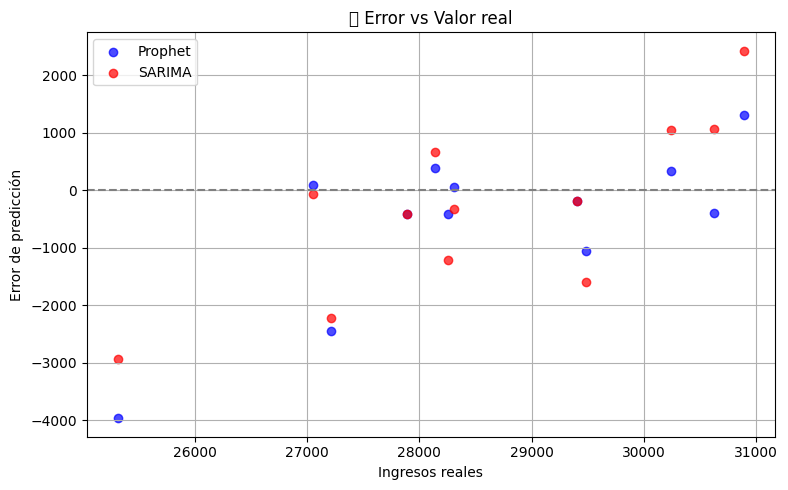

In [2]:
# ================================
# Análisis avanzado de errores
# ================================

# Errores individuales
test = test.copy()
test['error_sarima'] = test['y'] - sarima_forecast
test['error_prophet'] = test['y'] - prophet_pred

#Evolución de errores en el tiempo
plt.figure(figsize=(12, 4))
plt.plot(test['ds'], test['error_sarima'], label='SARIMA Error', linestyle='--')
plt.plot(test['ds'], test['error_prophet'], label='Prophet Error', linestyle=':')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Evolución del error de predicción")
plt.xlabel("Fecha")
plt.ylabel("Error ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución de errores
plt.figure(figsize=(12, 4))
plt.hist(test['error_sarima'], bins=15, alpha=0.6, label='SARIMA')
plt.hist(test['error_prophet'], bins=15, alpha=0.6, label='Prophet')
plt.title("Distribución de errores de predicción")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Dispersión real vs. error
plt.figure(figsize=(8, 5))
plt.scatter(test['y'], test['error_prophet'], alpha=0.7, label='Prophet', c='blue')
plt.scatter(test['y'], test['error_sarima'], alpha=0.7, label='SARIMA', c='red')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Error vs Valor real")
plt.xlabel("Ingresos reales")
plt.ylabel("Error de predicción")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
